In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread("/home/hero576/code/python/lane/data/001.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

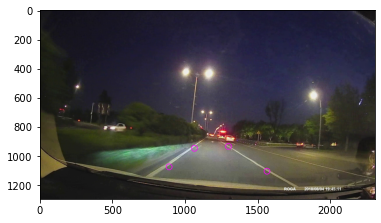

In [5]:
pts_src = np.array([(888, 1075), (1062, 948), (1296, 935), (1561, 1105)], dtype=float)
for p in pts_src:
    p = [int(i) for i in p]
    cv2.circle(img,tuple(p),20,(255,0,255),3)
plt.imshow(img)

[[ 518.4 1382.4]
 [ 518.4  921.6]
 [ 777.6  921.6]
 [ 777.6 1382.4]]


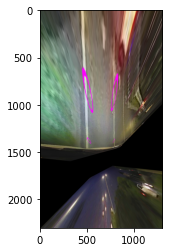

In [14]:
size = img.shape
dst_points = np.array(
    [
        [size[0]*0.4,size[1]*0.6],
        [size[0]*0.4, size[1]*0.4],
        [size[0]*0.6, size[1]*0.4],
        [size[0]*0.6, size[1]*0.6]
    ], dtype=float
)
print(dst_points)
h, status = cv2.findHomography(pts_src, dst_points)
ipm_out = cv2.warpPerspective(img, h, size[1::-1],flag)
plt.imshow(ipm_out)

In [7]:
def cvt_point(points,cvt_mat_t):
    u,v = points
    cvt_mat_t = h
    x = (cvt_mat_t[0][0]*u+cvt_mat_t[0][1]*v+cvt_mat_t[0][2])/(cvt_mat_t[2][0]*u+cvt_mat_t[2][1]*v+cvt_mat_t[2][2])
    y = (cvt_mat_t[1][0]*u+cvt_mat_t[1][1]*v+cvt_mat_t[1][2])/(cvt_mat_t[2][0]*u+cvt_mat_t[2][1]*v+cvt_mat_t[2][2])
    return x,y

In [8]:
for p in pts_src:
    print(cvt_point(p,h))

(518.4000244140618, 1382.4000244140602)
(518.400024414063, 921.5999755859311)
(777.5999755859375, 921.5999755859332)
(777.5999755859376, 1382.4000244140616)


In [9]:
ipm_out.shape

(1296, 2304, 3)